In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
rcParams['figure.figsize'] = 10,8
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (15,10)})

In [3]:
data=pd.read_csv('loan_predictions.csv')

In [4]:
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.shape

(614, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


# EDA

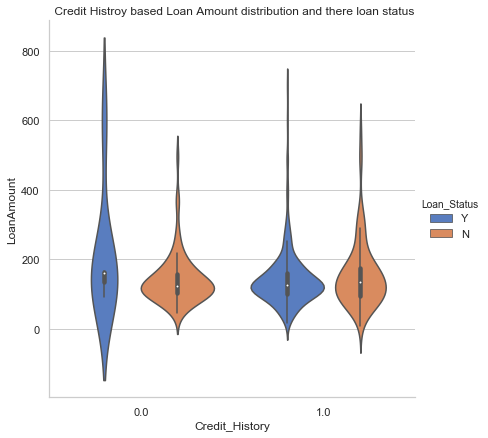

In [12]:
sns.catplot(x="Credit_History", y="LoanAmount", data=data, kind="violin", 
            hue= 'Loan_Status', height=6, aspect=1, color_codes=True)
                                                     
plt.title(' Credit Histroy based Loan Amount distribution and there loan status') 
plt.show()

Text(0.5, 1.0, 'Gender based Loan status count distribution')

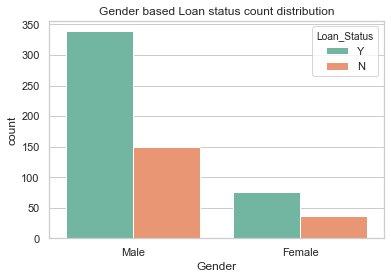

In [9]:
p=data['Gender']
sns.countplot(x=p, data=data, hue= 'Loan_Status', palette="Set2")
plt.title("Gender based Loan status count distribution")

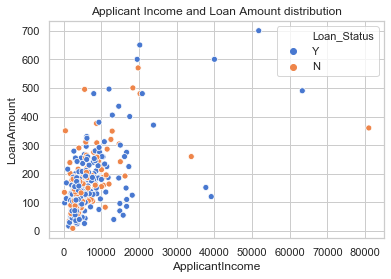

In [10]:
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=data)  
plt.title('Applicant Income and Loan Amount distribution')  
plt.show() 

Text(0.5, 1.0, 'Loan status count distribution')

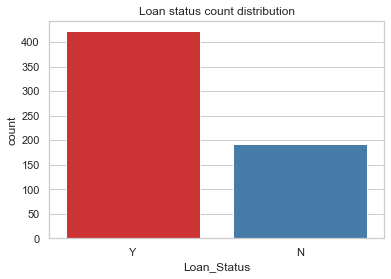

In [8]:
p=data['Loan_Status']
sns.countplot(x=p, data=data, palette="Set1")
plt.title("Loan status count distribution")

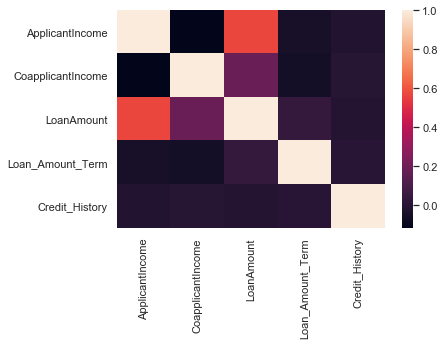

In [13]:
sns.heatmap(data.corr())

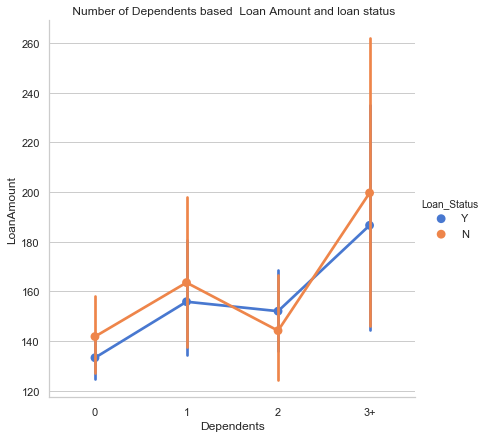

In [14]:
 sns.catplot(x="Dependents", y="LoanAmount", data=data, kind="point", 
            hue= 'Loan_Status', height=6, aspect=1)
                                                     
plt.title(' Number of Dependents based  Loan Amount and loan status') 
plt.show()

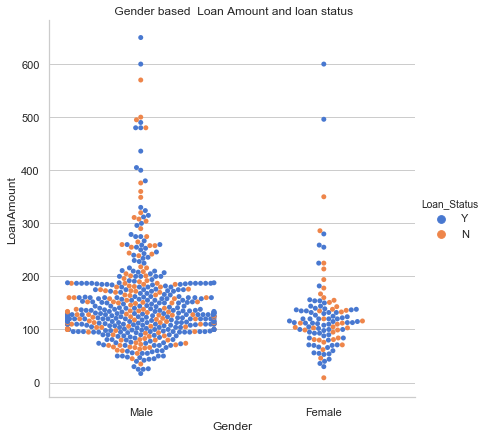

In [11]:
sns.catplot(x="Gender", y="LoanAmount", data=data, kind="swarm", 
            hue= 'Loan_Status', height=6, aspect=1)
                                                     
plt.title(' Gender based  Loan Amount and loan status') 
plt.show()

In [15]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
data.dropna(inplace=True)

In [31]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [32]:
data.replace({'Dependents': {'3+': 3}}, inplace=True)

In [33]:
data.replace({'Loan_Status': {'Y': 1, 'N': 0}}, inplace=True)

In [35]:
data=pd.get_dummies(data)

In [36]:
data.shape

(480, 21)

In [37]:
x=data.drop(['Loan_Status'], axis=1)
y=data['Loan_Status'].values.reshape(-1,1)
print(x.shape)
print(y.shape)

(480, 20)
(480, 1)


In [38]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x=ss.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
import time



In [54]:
models = []
results = []
names = []

models.append(("rfc", RandomForestClassifier()))
models.append(("XGB", XGBClassifier()))
models.append(("LGBM", LGBMClassifier()))
models.append(("ADA",AdaBoostClassifier()))
for name,model in models:
    strat_fold = StratifiedKFold(n_splits=10, random_state=52, shuffle=True)
    cv_result = cross_val_score(model,x_train,y_train, cv = strat_fold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())
for i in range(len(names)):
    print(names[i],results[i].std())

rfc 0.7731219760631526
XGB 0.7405704099821747
LGBM 0.7794397759103642
ADA 0.782811306340718
rfc 0.0741198215379039
XGB 0.057076459110953916
LGBM 0.04744675803868736
ADA 0.05010970125473206


In [49]:
name = []
for name,model in models:
    
    model.fit(x_train, y_train)
    clf_prediction = model.predict(x_test)
    _conf_matrix = confusion_matrix(y_test, clf_prediction)
    print("Confusion matrix of",model,":\n", _conf_matrix)
    print("Accuracy: \n {}".format (accuracy_score(y_test, clf_prediction)))
    print("Classification Report: \n {}".format (classification_report(y_test, clf_prediction)))

Confusion matrix of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) :
 [[22 22]
 [10 90]]
Accuracy: 
 0.7777777777777778
Classification Report: 
               precision    recall  f1-score   support

           0       0.69      0.50      0.58        44
           1       0.80      0.90      0.85       100

    accuracy                           0.78       144
   macro avg       0.75      0.70      0.71       144
weighted avg       0.77      0.78      0.77       144

Confusion matrix of XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,


In [51]:
predictions=model.predict(x_test)
predictions

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [59]:
from sklearn.externals import joblib   #save the model through joblib
joblib.dump(ADA, 'Loan_fraud.pkl')

['Loan_fraud.pkl']